### 1. Expolore data and check for missing values

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
data_path = "spam.csv"

df = pd.read_csv(data_path)
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.shape # data dimensionality

(5572, 2)

In [4]:
df.columns # Info about columns and their datatypes

Index(['Category', 'Message'], dtype='object')

In [5]:
df.info() # General information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.describe() # Summary statistics on the dataset

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
missing_values = df.isnull().sum()
missing_values

Category    0
Message     0
dtype: int64

### 2. Class distribution - categorical columns

In [8]:
df["Category"].value_counts() # Dataset is imabalanced

Category
ham     4825
spam     747
Name: count, dtype: int64

<Axes: xlabel='Category', ylabel='count'>

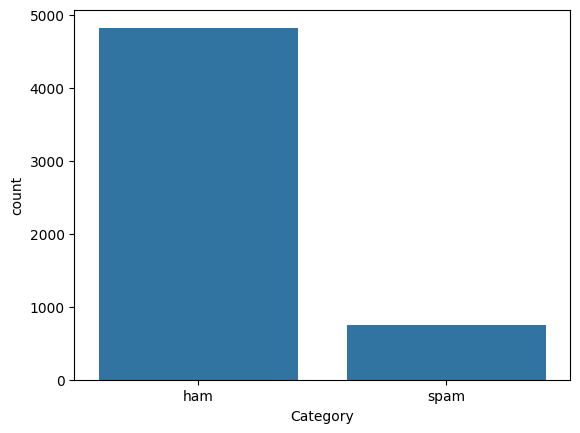

In [13]:
# Plotting the class distribution
sns.countplot(df, x="Category")

### 3. Text analysis

In [17]:
# Find the length of email
df['Email Length'] = df["Message"].str.len()

In [18]:
df.head()

,Category,Message,Email Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:
df['Word Count'] = df["Message"].apply(lambda text: len(text.split()))

In [20]:
df.head()

,Category,Message,Email Length,Word Count
0,ham,"Go until jurong point, crazy.. Available only ...",111,20
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,ham,U dun say so early hor... U c already then say...,49,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13


In [21]:
from wordcloud import WordCloud

In [25]:
df.iloc[0]["Message"]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

#### Filter spam and non-spam to create separate word clouds

In [36]:
spam_emails = df[df["Category"] == "spam"]
non_spam_emails = df[df["Category"] == "ham"]

In [43]:
spam_word_cloud = WordCloud(width=800, height=400).generate(text=' '.join(spam_emails["Message"]))
non_spam_word_cloud = WordCloud().generate(text=' '.join(non_spam_emails["Message"]))

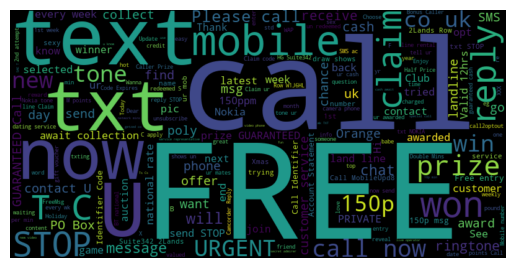

In [44]:
plt.imshow(spam_word_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

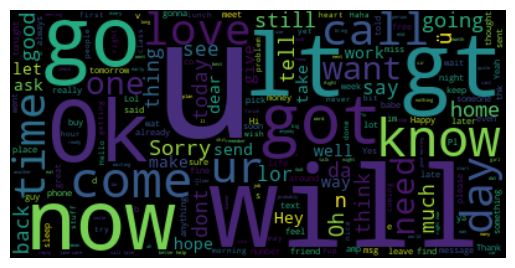

In [45]:
plt.imshow(non_spam_word_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()